### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 2: Predicting outcomes using classification and clustering

This week we will continue to learn about more different types of machine learning algorithms (classification and clustering) used in predictive analytics. These algorithms are used to analyse business trends and patterns to obtain meaningful business insights. We will also learn about the available Python tools that enable analysts to automate these tasks. Python libraries such as Pandas, Matplotlib, and Seaborn, can provide the tools to help businesses predict trends and make decisions. 

In addition, we will learn how to use these Python tools to create and test classification models, which are useful for analysing categorical data such as product types and customer segments. We will then continue to build on our knowledge of regression analysis techniques by learning how to use binary logistical regression, multinomial logistical regression, and support vector machines.

This is your Notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

### 2.1 Classification using Python

### 2.1.3 Worked example: Checking assumptions

In [119]:
# Import all the necessary packages.
import pandas as pd
import numpy as np

# Read the provided CSV file/data set.
df = pd.read_csv('customer_data.csv') 

# Print the table.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [123]:
df.dtypes

Age                int64
Occupation        object
Status            object
Edu               object
House             object
Loan              object
Comm              object
Month             object
DOW               object
Duration           int64
Campaign           int64
PosDays            int64
Last_out          object
Var_rate         float64
Price_idx        float64
Conf_idx         float64
Month_rate       float64
Quarterly_emp    float64
Target             int64
dtype: object

In [124]:
df.shape

(41188, 19)

In [122]:
# Checking for MISSING VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

# 

#### NO MISSING VALUES

In [8]:
# Target is not in the METADATA, so this is the target for the customer to leave or stay: binary.
# Target is dependant variable, so assumptions 1,2 and 6 (large data) are met

### 2.1.4 Worked example II: Checking for meaningful variables


In [125]:
df['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [ ]:
# As part of data wrangling, let's change these names
# We create two lists with current titles and output titles

In [126]:
initial_vals = ['illiterate', 'unknown', 'basic', 'high', 'university', 'professional']
new_vals = ['other', 'other', 'pre-school', 'high-school', 'uni', 'masters']

In [127]:
# Now we create a for loop statement to replace the initial values with the new values (new_vals)

In [128]:
# Create a for loop to replace the values.
for old_val, new_val in zip(initial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val

In [129]:
df['Edu'].value_counts()

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [130]:
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [ ]:
# Converting strings to numbers
# import sklearn and define a user define function to make the change

In [131]:
# Import the necessary modules, classes and packages.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

In [132]:
# Create a class and write a user defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self
    
# View the output.
df.select_dtypes(include='object')

,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Last_out
0,blue-collar,married,pre-school,yes,no,cellular,aug,thu,nonexistent
1,technician,married,other,no,no,cellular,nov,fri,nonexistent
2,management,single,uni,yes,no,cellular,jun,thu,success
3,services,married,high-school,no,no,cellular,apr,fri,nonexistent
4,retired,married,pre-school,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...
41183,retired,married,high-school,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,pre-school,no,no,telephone,may,thu,nonexistent
41185,admin.,single,uni,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,masters,no,yes,telephone,oct,tue,nonexistent


In [133]:
# Order lists of the values for each column containing strings.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']
House_order = ['no', 'unknown', 'yes']
Loan_order = ['no', 'unknown', 'yes']
Month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
               'nov', 'dec']
DOW_order = ['mon', 'tue', 'wed', 'thu', 'fri']
Last_out_order = ['nonexistent', 'failure', 'success']

In [135]:
# List of values to transform into numbers even though the values are not ordered.
Occupation_list = ['unemployed', 'unknown', 'student', 'blue-collar',
                   'technician', 'housemaid', 'admin.','retired',
                   'self-employed', 'entrepreneur', 'management', 'services']
Status_list = ['unknown', 'single', 'divorced', 'married']
Comm_list = ['cellular', 'telephone']

In [136]:
# Create a list containing all of the list of values.
Encoding_list = [Occupation_list, Status_list, Edu_order, House_order,
                 Loan_order, Comm_list, Month_order, DOW_order, Last_out_order]

In [137]:
# Pick non-numerical columns.
object_cols = df.select_dtypes(include= 'object').columns

In [138]:
#Transform string values to number with our LabelEncoder function.
for idx in range(len(object_cols)): 
    
    le = MyLabelEncoder()
    le.fit(Encoding_list[idx])
    df[object_cols[idx]] = le.transform(df[object_cols[idx]])

In [139]:
# View the DataFrame.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [26]:
# Now we need to BALANCE THE DATA

In [140]:
# Determine if values in a column are balanced.
df['Target'].value_counts()

0    36548
1     4640
Name: Target, dtype: int64

In [29]:
# There are many more 0 than 1: let's see it visually plotting the 'Target' column data

Text(0.5, 1.0, 'Target Imbalance')

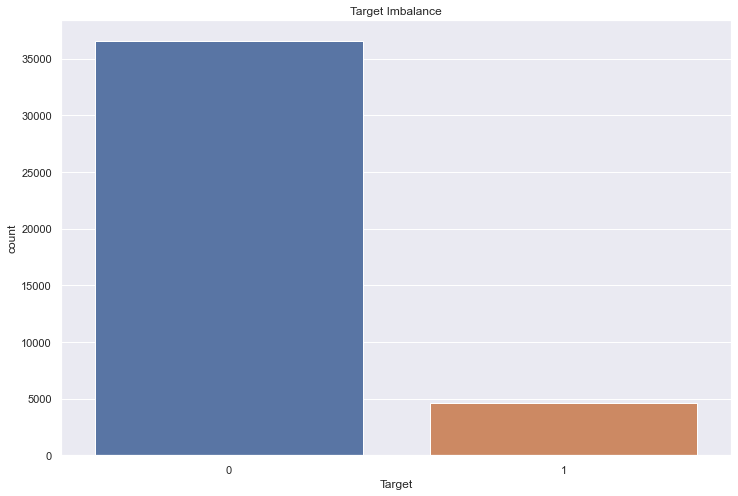

In [141]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

In [142]:
# Confirmed: we need to balance the data, for which we need a few more libraries.

# Handles unbalanced data (scikit-learn needed).
!pip install imblearn  
# Optimised linear, algebra, integrations (scientific).
!pip install scipy  
# Simple tools for predictive data analytics.
!pip install scikit-learn  
# Oversampling technique; creates new samples from data.
!pip install SMOTE

In [143]:
# Import necessary packages.
# import imblearn
# from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [144]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split


# Set the variables:
X = df.drop('Target', axis = 1)
y = df['Target']

# Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame
print(os_data_X.head())
os_data_y.head()

   Age  Occupation  Status  Edu  House  Loan  Comm  Month  DOW  Duration  \
0   31           4       1    3      0     0     0      8    1       259   
1   44           6       3    4      2     0     1      2    0       300   
2   43          10       3    4      2     0     1      2    0       134   
3   35           3       3    1      0     0     0      8    1       169   
4   33           6       1    3      2     2     0      2    3       255   

   Campaign  PosDays  Last_out  Var_rate  Price_idx  Conf_idx  Month_rate  \
0         1      999         1      -0.1     93.200     -42.0       4.153   
1         1      999         0       1.1     93.994     -36.4       4.857   
2         1      999         0       1.1     93.994     -36.4       4.857   
3         2      999         0      -0.1     93.200     -42.0       4.153   
4         2      999         1      -1.8     92.893     -46.2       1.266   

   Quarterly_emp  
0         5195.8  
1         5191.0  
2         5191.0  
3   

,Target
0,0
1,0
2,0
3,0
4,0


In [145]:
# Determine if values in a column are balanced by counting the values.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

Text(0.5, 1.0, 'New Balanced Target')

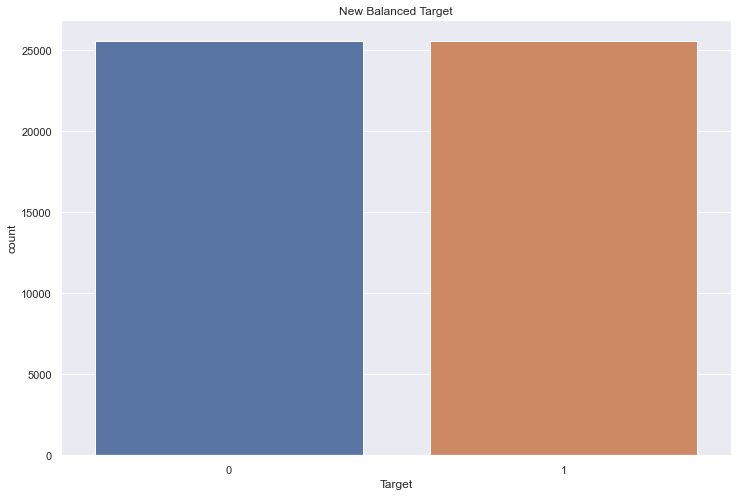

In [146]:
# And we visualise it 

sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

### 2.1.5 Worked example III: Checking the logistic regression assumptions (Cont.)

In [ ]:
# We now continue checking the two assumptions left: 4 (multicollinearity) and 5
# (Independent variables linearly related to the log odds)

In [63]:
# We study co-multillinearity with Variance Inflation Factor (VIF)

"""Note that a VIF<10 indicates limited to no correlation between independent variables. The closer the VIF is to 1, 
the less correlation between independent variables. However, a VIF>10 indicates a multicollinearity problem due to 
strong correlations. """

'Note that a VIF<10 indicates limited to no correlation between independent variables. The closer the VIF is to 1, \nthe less correlation between independent variables. However, a VIF>10 indicates a multicollinearity problem due to \nstrong correlations. '

In [147]:
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

In [149]:
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

In [150]:
# View the output.
vif_data

,feature,VIF
0,Age,18.783790
1,Occupation,5.169369
2,Status,9.154831
3,Edu,5.084178
4,House,2.206817
5,Loan,1.207593
6,Comm,3.863707
7,Month,7.971358
8,DOW,2.975899
9,Duration,2.451436


In [151]:
# The values of Duration, Campaign and Target are less than 10 (even <5) indicating no correlation between 
#these independent variables.

In [152]:
# Droping the columns with VIF > 10 to avoid multicollinearity problems.
df = df.drop(['Price_idx', 'Quarterly_emp'], axis = 1)

# View the DataFrame.
print(df.shape)
df.head()

(41188, 17)


,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Conf_idx,Month_rate,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,-36.1,4.963,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,-42.0,4.021,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,-39.8,0.729,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,-47.1,1.405,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,-31.4,0.869,1


In [69]:
# These two columns have been dropped.

The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). However, the Box-Tidwell test is only applicable to continuous variables. Since we only have one continuous column left, we can do a visual check of the linearity with log odds using this column. When having multiple continuous columns or when we can’t visually see the linear relationship, it’s better to use Box-Tidwell test.  

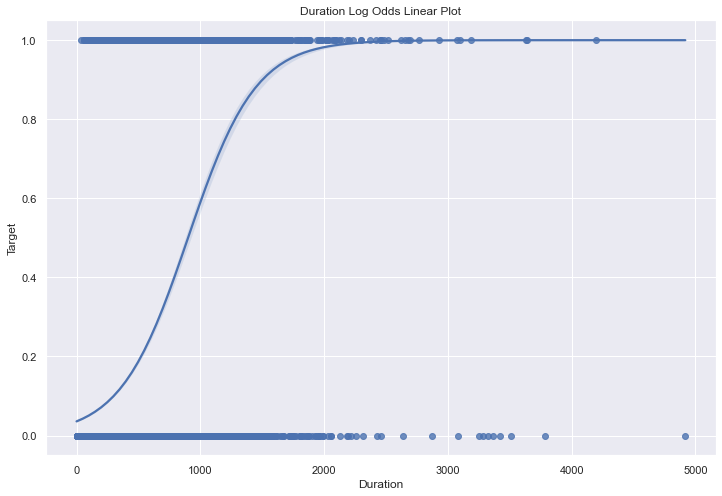

In [153]:
# We are plotting looking for a S-shaped curve.

dur = sns.regplot(x = 'Duration', y= 'Target', data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

In [154]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = df.drop('Target', axis = 1).columns

# Set the independent variable.
X = df[nec_cols]  

# Set the dependent variable.
y = df['Target']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.222768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41172
Method:                           MLE   Df Model:                           15
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.3672
Time:                        20:53:45   Log-Likelihood:                -9175.4
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0125      0.002      7.237      0.000       0.009       0.016
Occupation     0.0004      0.007      0.058      0.954      -0.014       0.014
Status        -0.1148      0.023     -4.922      0.000      -0.160      -0.069
Edu            0.1352      0.018      7.641      0.000       0.101       0.170
House          0.0069      0.020      0.347      0.728      -0.032       0.046
Loan          -0.0280      0.027     -1.025      0.305      -0.082       0.026
Comm          -0.2290      0.056     -4.086      0.000      -0.339      -0.119
Month          0.0683      0.010      6.583      0.000       0.048       0.089
DOW            0.0179      0.014      1.301      0.193      -0.009       0.045
Duration       0.0046   7.14e-05     63.865      0.000       0.004       0.005
Campaign      -0.0358      0.011     -3.200      0.001      -0.058      -0.014
PosDays       -0.0020      0.000    -18.455      0.000      -0.002      -0.002
Last_out      -0.2079      0.052     -4.000      0.000      -0.310      -0.106
Var_rate      -0.0972      0.036     -2.713      0.007      -0.167      -0.027
Conf_idx       0.0250      0.003      9.088      0.000       0.020       0.030
Month_rate    -0.5066      0.035    -14.426      0.000      -0.575      -0.438
==============================================================================
"""

In [155]:
# Now we need to check the accuracy of this model

# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [156]:
# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train)

LogisticRegression()

In [157]:
# Previous test would have given result: 'LogisticRegression()', meaning function is active.
# If it is active that means we can determine BLR model’s accuracy with logreg:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


#### Accuracy of logistic regression classifier on test set: 0.86

The accuracy is 85% which is a great fit for this data set and business question. However, if you had an 85% accuracy fit for a business question based on a ‘ yes’ or ‘no’ answer, it might not be a good fit. To further test the model’s accuracy, we can also employ a confusion matrix to evaluate the accuracy of the classification.

<AxesSubplot:>

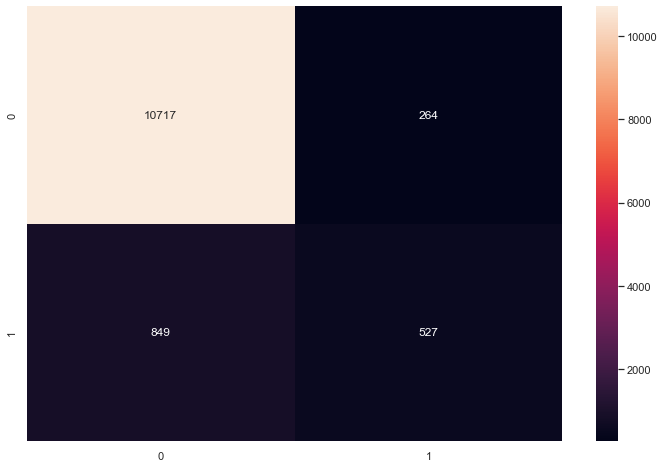

In [158]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [159]:
# We can see that 'True Positive' and 'True Negative' are much bigger that "False Positive"/'False Negative'
# Now we ran a classification report to find out precision, recall, f1 score and support

# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.67      0.38      0.49      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



#### Precision scores are 85-86%, very high. Our model is accurate.

### 2.1.7 Worked example: Building an MLR model

In [160]:
# Import all the necessary packages: Pandas, NumPy, SciPy, Sklearn, StatsModels.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [161]:
# Upload the CSV file.
oysters = pd.read_csv('oysters.csv')  

# Print the columns.
oysters.columns 

Index(['sex', 'length', 'diameter', 'height', 'total_weight', 'raw_weight',
       'intestines_weight', 'shell_weight', 'age'],
      dtype='object')

In [3]:
# View the DataFrame.
oysters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB


In [162]:
oysters.shape

(9484, 9)

In [163]:
oysters.head()

,sex,length,diameter,height,total_weight,raw_weight,intestines_weight,shell_weight,age
0,male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,female,0.575,0.475,0.160,0.8950,0.3605,0.2210,0.2710,9
2,male,0.575,0.450,0.155,0.8860,0.3605,0.2110,0.2575,9
3,infant,0.580,0.460,0.140,0.9265,0.4135,0.1845,0.2700,10
4,infant,0.580,0.460,0.140,0.8295,0.3915,0.1650,0.2380,10


In [164]:
# Apply the value_counts() method, and 
# assign the results to a new DataFrame.
oysters_sex = oysters['sex'].value_counts()
print(oysters_sex)

male      3561
female    3113
infant    2810
Name: sex, dtype: int64


Unlike in the previous BLR example you worked through, the categories have relatively similar counts, so the data is balanced; you won’t need to take extra steps to balance the data in this instance. The next steps will be 
- to separate the dependent variable from the independent variables
- build the model
- create the equation
- test the model’s accuracy. 

In [165]:
# Set the independent and dependent variables:
# Set the independent variable.
X = oysters.drop(['sex'], axis=1)
# Set the dependent variable.
y = oysters['sex']

In [166]:
# Print to check sex column was dropped.
print(list(X.columns.values))

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']


In [167]:
# Specify the train and test data sets and 
# use 30% as the ‘test_size’ and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30, \
                                                                            random_state = 1, stratify=y) 

# Print the shape of all the train and tests sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6638, 8)
(2846, 8)
(6638,)
(2846,)


Output:
    
['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight',
 'shell_weight', 'age']

(6638, 8)
(2846, 8)
(6638,)
(2846,)

Great! The sex column was dropped and the shape of all four data sets was printed. Here’s what we can confirm:

- X_train had 6,638 rows and eight columns
- X_test had 2,846 rows and eight columns
- y-train had 6,638 rows
- y_test had 2,846 rows. 

The output is correct because 30% of 9,484 values is 2,845.2 (2,846 rounded up as you cannot get a partial oyster). 

In [168]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

In [169]:
# Create a function and set values.
scaler = MinMaxScaler(feature_range = (0,1))   

In [170]:
# Add the X_train data set to the ‘scaler’ function.
scaler.fit(X_train)
# Specify X_train data set.
X_train = scaler.transform(X_train) 
# Specify X_test data set. 
X_test = scaler.transform(X_test)

Next, you need to start building the MLR model, which is similar to the BLR of the previous topics. Follow along to print the parameters for the model:

In [171]:
# Define the MLR model and  set predictions and parameters.
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, y_train)
# Set the predictions equal to the ‘MLR’ function and 
# specify the DataFrame.
preds = MLR.predict(X_test) 

# Set the parameters equal to the DataFrame and 
# add the ‘get_params’ function. 
params = MLR.get_params() 

# Print the parameters.
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Output if libraries would have worked:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True,
 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 
 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 
 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

In [172]:
# Next, we need to evaluate the MLR intercept and coefficients as follows:

print("Intercept: \n", MLR.intercept_)
print("Coefficients: \n", MLR.coef_)

Intercept: 
 [-1.84884197  1.60342394  0.24541803]
Coefficients: 
 [[ -5.81733934   5.78005456   5.43352277   5.13188766  -5.01932241
    4.32806836  -1.07709348   1.35837572]
 [ 10.24642525  -6.10000503  -7.87967316 -11.48771487   6.38638167
   -6.62217333   1.90520149  -3.11255116]
 [ -4.42908591   0.31995047   2.44615039   6.35582721  -1.36705925
    2.29410497  -0.82810801   1.75417544]]


Intercept: [-1.84354304 1.2453045 0.59823854] 

Coefficients:
 [[ -7.86123087 9.71436979 4.80820842 1.8175752 -3.37550025
    5.69858878 -1.073312 0.04851337]
 [ 13.84651823 -10.25218773 -6.97271582 -4.06859041 4.29483074
   -8.71920548 1.89845941 -0.11116259]
 [ -5.98528736 0.53781794 2.1645074 2.25101521 -0.91933049
    3.0206167 -0.82514742 0.06264922]]

In [173]:
# Now we create a linear equation from the logit model

# Name the model and [2] Set model to the function.
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model

# Specify how the function returns the results.
result=logit_model.fit()  

# Print the report as a result.summary() function: 
print("Summary for Sex:I/M :\n ", result.summary())

Optimization terminated successfully.
         Current function value: 0.854457
         Iterations 8
Summary for Sex:I/M :
                            MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 6638
Model:                        MNLogit   Df Residuals:                     6620
Method:                           MLE   Df Model:                           16
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.2189
Time:                        20:55:28   Log-Likelihood:                -5671.9
converged:                       True   LL-Null:                       -7261.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
sex=infant       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4522      0.316     10.913      0.000       2.832       4.072
x1   

#### The result of this last operation would be a table with all the parametres of the model

In [174]:
# Now we determine the accuracy of the model

# Create and print a confusion matrix:
# y_test as the first argument and the predictions as the second argument. 
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array 
pd.DataFrame(cmatrix, index=['female','infant', 'male'],
columns=['predicted_female', 'predicted_infant', 'predicted_male'])

,predicted_female,predicted_infant,predicted_male
female,314,160,460
infant,57,676,110
male,304,244,521


Now, write the code that will determine the accuracy statistics and create the classification report, which looks like this: 

In [175]:
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

Accuracy score: 0.5309205903021785
              precision    recall  f1-score   support

      female       0.47      0.34      0.39       934
      infant       0.63      0.80      0.70       843
        male       0.48      0.49      0.48      1069

    accuracy                           0.53      2846
   macro avg       0.52      0.54      0.53      2846
weighted avg       0.52      0.53      0.52      2846



### The accuracy of the model is 55%, which is not very accurate and therefore not useful as a predictive model. It seems that there is a 48% chance of success to indicate females by employing size as a variable. Therefore, as breeding programmes are very expensive and time-consuming, it might not be the best way to proceed. While inaccuracy seems to be a negative indicator, in fact, we have saved the oyster breeders a lot of wasted time and money. (Imagine they used size to indicate sex, this would be catastrophic as predictions would only be correct about half the time!)

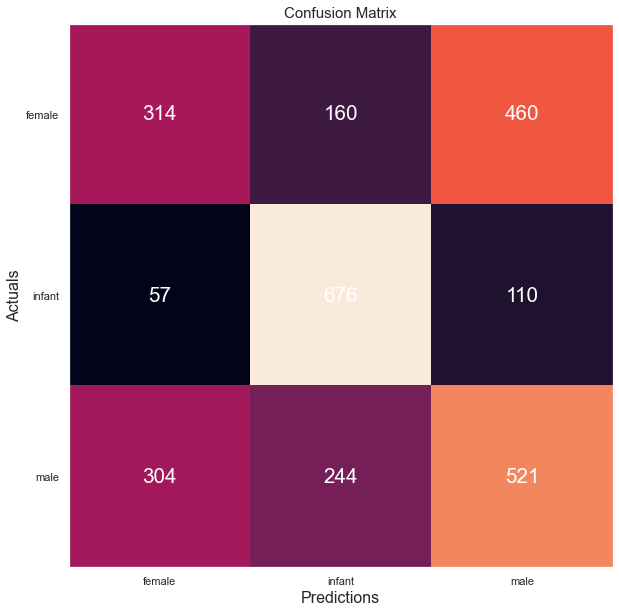

In [176]:
# If we try to visualize the model (that will look like a MATRIX)

# Import matplotlib to create a visualisation.
import matplotlib.pyplot as plt  

# Define confusion matrix.
cm = confusion_matrix(y_test, preds)  

# Create visualisation for the MLR:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))

# ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', size='xx-large')
        
# Sets the labels.
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

plt.show()

In [40]:
print('Confusion Matrix - Screenshot 2022-07-22 at 10.29.39.png')

Confusion Matrix - Screenshot 2022-07-22 at 10.29.39.png


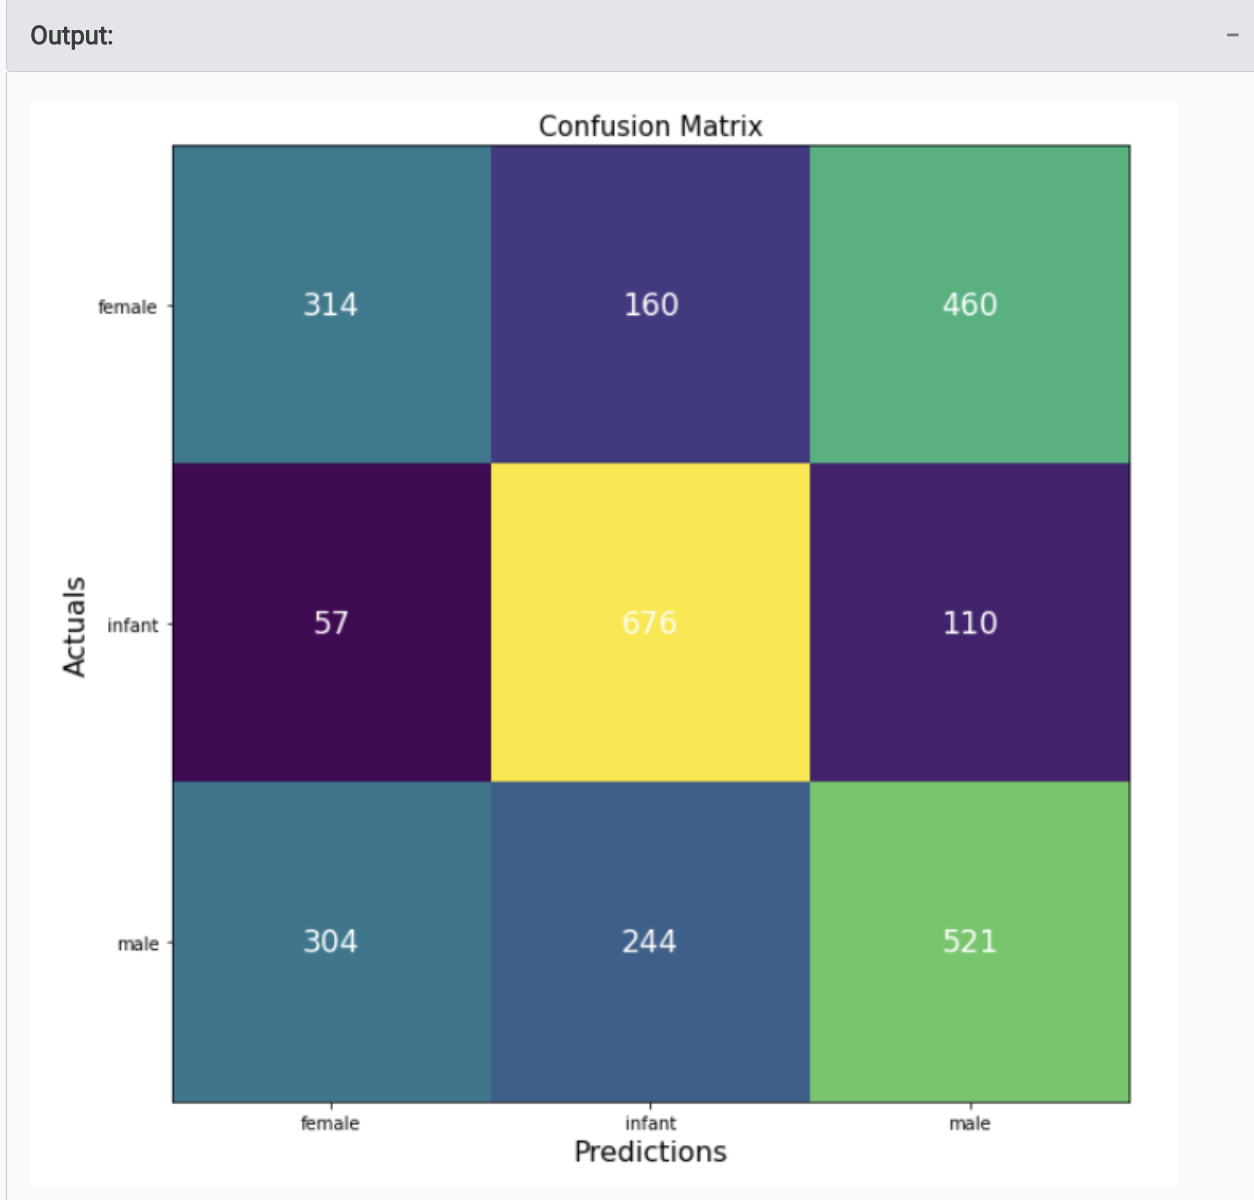

### The oyster research station needed to accurately determine the sex of mature oysters based on size measurements. Using multinomial logistic regression (MLR), we can now see from the output (which is essentially a confusion matrix) that our model correctly classified 314 females as females while it incorrectly classified 160 cases as infants and 460 cases as males. Similarly, 57 cases were incorrectly identified as infants while 676 cases were accurately classified as infants. But there were 110 cases that were incorrectly identified as males. Finally, there were 304 and 244 cases where the model incorrectly classified the males as females and infants respectively. But it also identified 521 accurate cases of male. 

### 2.2 Decision tree using Python

### 2.2.2 Worked example: Creating decision trees

In [1]:
# Import all necessary libraries.
import pandas as pd 
import numpy as np 
import scipy as scp

In [2]:
import sklearn
from sklearn import metrics

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
pip install --upgrade --no-deps statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm

In [5]:
# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

In [6]:
# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')

In [7]:
# Read the provided CSV file/data set.
df = pd.read_csv('customer_data.csv')  

# Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

#### Update variables in the Edu column

In [8]:
# As with the BLR and SVM models, we need to update the Edu column to eliminate any periods. 
# The same code snippet and explanation applies compared to the BLR and SVM models.

# [1] Update all the details of the education column:
df.loc[df['Edu'].str.contains('basic'),'Edu' ] = 'pre-school'
df.loc[df['Edu'].str.contains('university'),'Edu' ] = 'uni'
df.loc[df['Edu'].str.contains('high'),'Edu' ] = 'high-school'
df.loc[df['Edu'].str.contains('professional') ,'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'),'Edu' ] = 'other'
df.loc[df['Edu'].str.contains('unknown'),'Edu' ] = 'other'

# [2] Display all the unique values/check changes.
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

#### Create dummy variables

In [ ]:
# The next step is to create the dummy variables (to account for the effects of one or more nominal-scale 
# variables on the dependent variable). When fitting a decision tree, however, you might not need to create 
# dummy variables, for example, if the values are already discrete. For consistency with the BLR and SVM models,
# we will run the code snippet. 

In [9]:
# Name new DataFrame and convert categorical variables to dummy variables:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# Use the for loop keyword to specify what actions to
# apply to all the 'var' items:
# Specify what needs to apply to all the variables.
for var in cat_vars:  
    # cat_list='var'+'_'+var
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df=df.join(cat_list) 

df_fin = df.drop(cat_vars,axis=1) 

# Specify the column names:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist()  

# Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
df_fin=df[to_keep]  

# Print the column.
df_fin.columns.values 

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

The classification decision tree is not a regression model. Therefore, we don’t have to specify the variables ( and ) as we did with the BLR model. However, for consistency in comparing the final result with the BLR and SVM models, we still have to apply the SMOTE process to balance the data. (Recall that SMOTE stands for 'Synthetic Minority Oversampling Technique' and describes a statistical solution for balancing data sets so that classes or categories are approximately represented; see: 2.1.4 Worked example II: Checking for meaningful variables (Assumption 3)). 

The same code snippet and explanations apply as in the previous practical activity, only the order differs. As with the BLR model and SVMs, we first applied the SMOTE process and then selected the necessary columns:

- Create the DataFrame to use as df_fin and replace missing values with zero (0).
- Select only the necessary columns.
- Create a new DataFrame and apply SMOTE as the target variable is not balanced.
- Specify column values.
- Specify the new data sets.
- Create two DataFrames for X and one for y.
- Print/check the DataFrame.

In [10]:
# Create a DataFrame to use as df_fin and replace missing values with zero.
df_fin = df_fin.fillna(0)  

# Select necessary columns: 
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# Create a new DataFrame and 
# apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# Print/check the DataFrame:
print("length of oversampled data is ",len(os_data_X))

os_data_y

length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [11]:
# Determine if values in a column are balanced.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

In [12]:
# In this case, the data is balanced as there are an equal number of  0s and 1s.

#### Build and fit the decision tree model

In [37]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc
# We choose the level of depth here (could be 4, could be anything we's like)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Train the decision tree classifier.
dtc = dtc.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc.predict(X_test)

#### Determine the accuracy of the model

In [38]:
# Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision. 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall.
print("Recall:",metrics.recall_score(y_test, y_pred))

[[8561 2420]
 [ 956  420]]
Accuracy: 0.726794529416525
Precision: 0.14788732394366197
Recall: 0.30523255813953487


In [39]:
# You can also use the following code to generate the classification report:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     10981
           1       0.15      0.31      0.20      1376

    accuracy                           0.73     12357
   macro avg       0.52      0.54      0.52     12357
weighted avg       0.82      0.73      0.76     12357



#### Matrix results can be presented in a table:

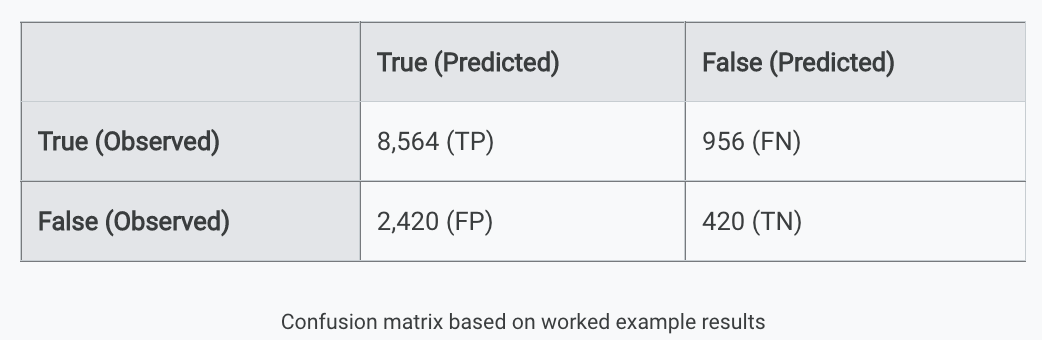



We can note the following from these results:

- The accuracy of the model is 72.7%, indicating the model is somewhat accurate at correctly identifying relevant customers versus irrelevant customers. (Hint: Remember that you have to use the weighted average.)
- A precision score of 14.8% is very low, which indicates that many of the selected customers did not, in fact, fit the required profile. (Hint: We have specified the customers that fit the profile as 1.)
- The recall score of 30% is relatively low, indicating that the model is incorrectly classifying many positive cases (i.e. there were 2,420 false positives, to be precise). (Hint: We have specified the customers that fit the profile as 1.)

These scores are not necessarily a problem if the business prefers to rather identify some people who don’t fit the customer profile rather than potentially miss out on potential customers who do. 

How do these scores compare with the output of the BLR and SVM models? Recall the BLR model predicted a 91% fit, and the SVM predicted only a 64% fit. The result of all three tests can be tabulated as follows:

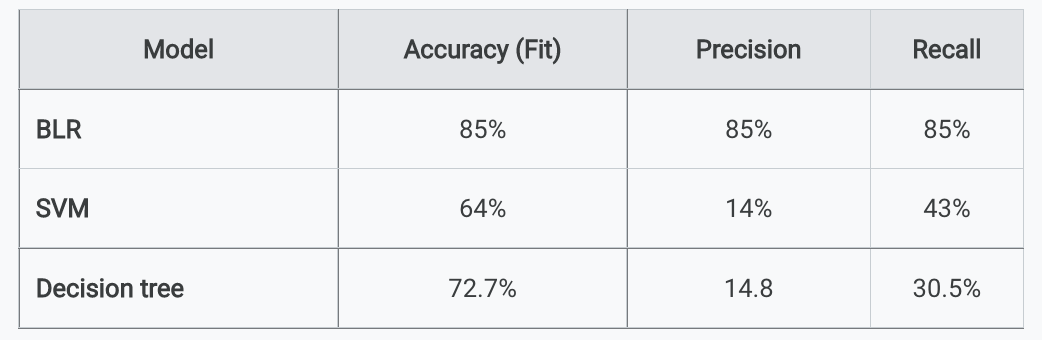

In [16]:
# We would advice for the business to choose the BLR model as it is more accurate

#### Visualise the model

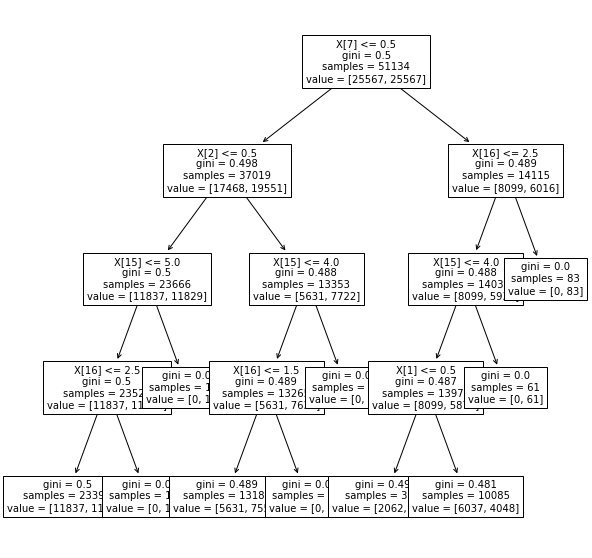

In [40]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)

# Print the plot with plt.show().
plt.show()

You can change the number of levels of the decision tree to be displayed by adjusting the value of max_depth. Play around with this and change it to 3, 6, 10 or any number you prefer, indicating to Python how many levels to display. 

### 2.2.3 Worked example: Regression decision tree

In [42]:
# Import all necessary libraries:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
# Note: Provides classes and functions to estimate many
# different statistical methods.
import statsmodels.api as sm  

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
# Filter out any warning messages.
warnings.filterwarnings('ignore')  

#Read the provided CSV file/data set.
df = pd.read_csv('ecommerce.csv')

#Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


In [43]:
df.head()

,Sale,por_OS,por_NON,recc,avg_no_it,age,dis,diff_reg,tax,bk,lowstat,Median_s
0,0.63,18.0,2.31,0,6.575,65.2,4.0900,1,296,396.90,4.98,24.0
1,2.73,0.0,7.07,0,6.421,78.9,4.9671,2,242,396.90,9.14,21.6
2,2.73,0.0,7.07,0,7.185,61.1,4.9671,2,242,392.83,4.03,34.7
3,3.24,0.0,2.18,0,6.998,45.8,6.0622,3,222,394.63,2.94,33.4
4,6.91,0.0,2.18,0,7.147,54.2,6.0622,3,222,396.90,5.33,36.2


In [50]:
# Now we build and fit the model

# Specify that the column Median_s 
# should be moved into a separate DataFrame.
cols = df.columns[df.columns != 'Median_s']  

# Specify ‘X’ as the independent variables 
# and ‘y’ as the dependent variable:
X = df[cols]
y = df['Median_s']

# Split the data training and testing 30/70:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

# Import the ‘DecisionTreeRegressor’ class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

# Create the ‘DecisionTreeRegressor’ class 
# (which has many parameters; input only #random_state=0):
regressor = DecisionTreeRegressor(random_state=0, max_depth=2)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(max_depth=2, random_state=0)

In [51]:
# Import the necessary packages:
from sklearn import metrics
import math

# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model):
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# [3b] Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error:  3.8770555021332163
Mean Squared Error:  31.424688554487044
Root Mean Squared Error:  5.60577278833945


The output indicates that the MAE is 3.26, the MSE is 26.4, and the RMSE is 5.14, rounded to two decimals. What does the output imply? Let’s compare RMSE and MAE. The difference between them is ‘1.88’, considered a small number since it is close to 0. Numbers close to 0 indicate that there are no large errors in the forecast. 

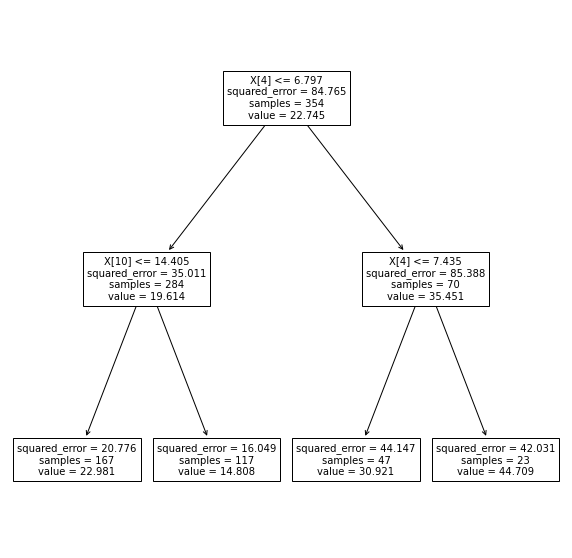

In [52]:
# Import matplotlib to create a visualisation 
# and the tree package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(regressor, fontsize=10)

# Print the plot with plt.show().
plt.show()

### 2.2.5 Random forests

In [54]:
# Import all the necessary packages.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [55]:
# Import the CSV file.
df = pd.read_csv('customer_data.csv') 

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

In [56]:
# Update all the details of the education column:
df['Edu'][df['Edu'].str.contains('basic') ] = 'pre-school'
df['Edu'][df['Edu'].str.contains('university') ] = 'uni'
df['Edu'][df['Edu'].str.contains('high') ] = 'high-school'
df['Edu'][df['Edu'].str.contains('professional') ] = 'masters'
df['Edu'][df['Edu'].str.contains('illiterate') ] = 'other'
df['Edu'][df['Edu'].str.contains('unknown') ] = 'other'

df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

#### Now we create the dummy variables

In [57]:
# Name the new DataFrame and convert categorical variables to dummy variables.
cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
          'Comm', 'Month', 'DOW', 'Last_out']

# Use the for loop keyword to specify what actions to apply to all the var items.
# Specify what needs to apply to all the variables.
for var in cat_vars:  
    cat_list='var'+'_'+var
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df1=df.join(cat_list)  
    # Set old DataFrame with new df with dummy values.
    df=df1  
cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
          'Comm', 'Month', 'DOW', 'Last_out']

# Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist()  

# Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
df_fin=df[to_keep]

# Print the column.
df_fin.columns.values  

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

#### Balancing the data 

In [58]:
# Divide data into attributes and labels - all columns. 
X = df_fin.iloc[:, 0:18].values
y = df_fin.iloc[:, 18].values

# Apply SMOTE as the target variable is not balanced.
df_fin = df_fin.fillna(0)

# Select only the necessary columns and variables.
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

# Set the independent variables.
X = df_fin[nec_cols]  
# Set the dependent variable.
y = df_fin.loc[:, df_fin.columns == 'Target']  

# Create a new DataFrame and [4a] apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify column values. 
columns = X_train.columns  

# Perform oversampling.
# Specify the new data sets. 
os_data_X,os_data_y = os.fit_resample(X_train, y_train)    

# Create two DataFrames for X and one for y from oversampling:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# Print the DataFrame.
print("length of oversampled data is ",len(os_data_X))  
os_data_y

length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


#### Build and fit the model

In [59]:
# Import the RandomForestClassifier class.
from sklearn.ensemble import RandomForestClassifier  

# Create a forest object based on the RandomForestClassifier, setting the HYPERPARAMETRES:
forest=RandomForestClassifier(n_estimators=200, criterion='gini', 
                              min_samples_split=2, min_samples_leaf=2, 
                              max_features='auto', bootstrap=True, n_jobs=-1, 
                              random_state=42)


# Train and predict the model.
forest.fit(X_train, y_train)  
y_pred = forest.predict(X_test)

In [60]:
# Determine if values are balanced.
os_data_y['Target'].value_counts() 

0    25567
1    25567
Name: Target, dtype: int64

#### Determine the accuracy of the model

In [61]:
# Import the necessary package.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Print a report on the model's accuracy.
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[10981     0]
 [ 1376     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10981
           1       0.00      0.00      0.00      1376

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357

0.88864611151574


#### Visualise the model

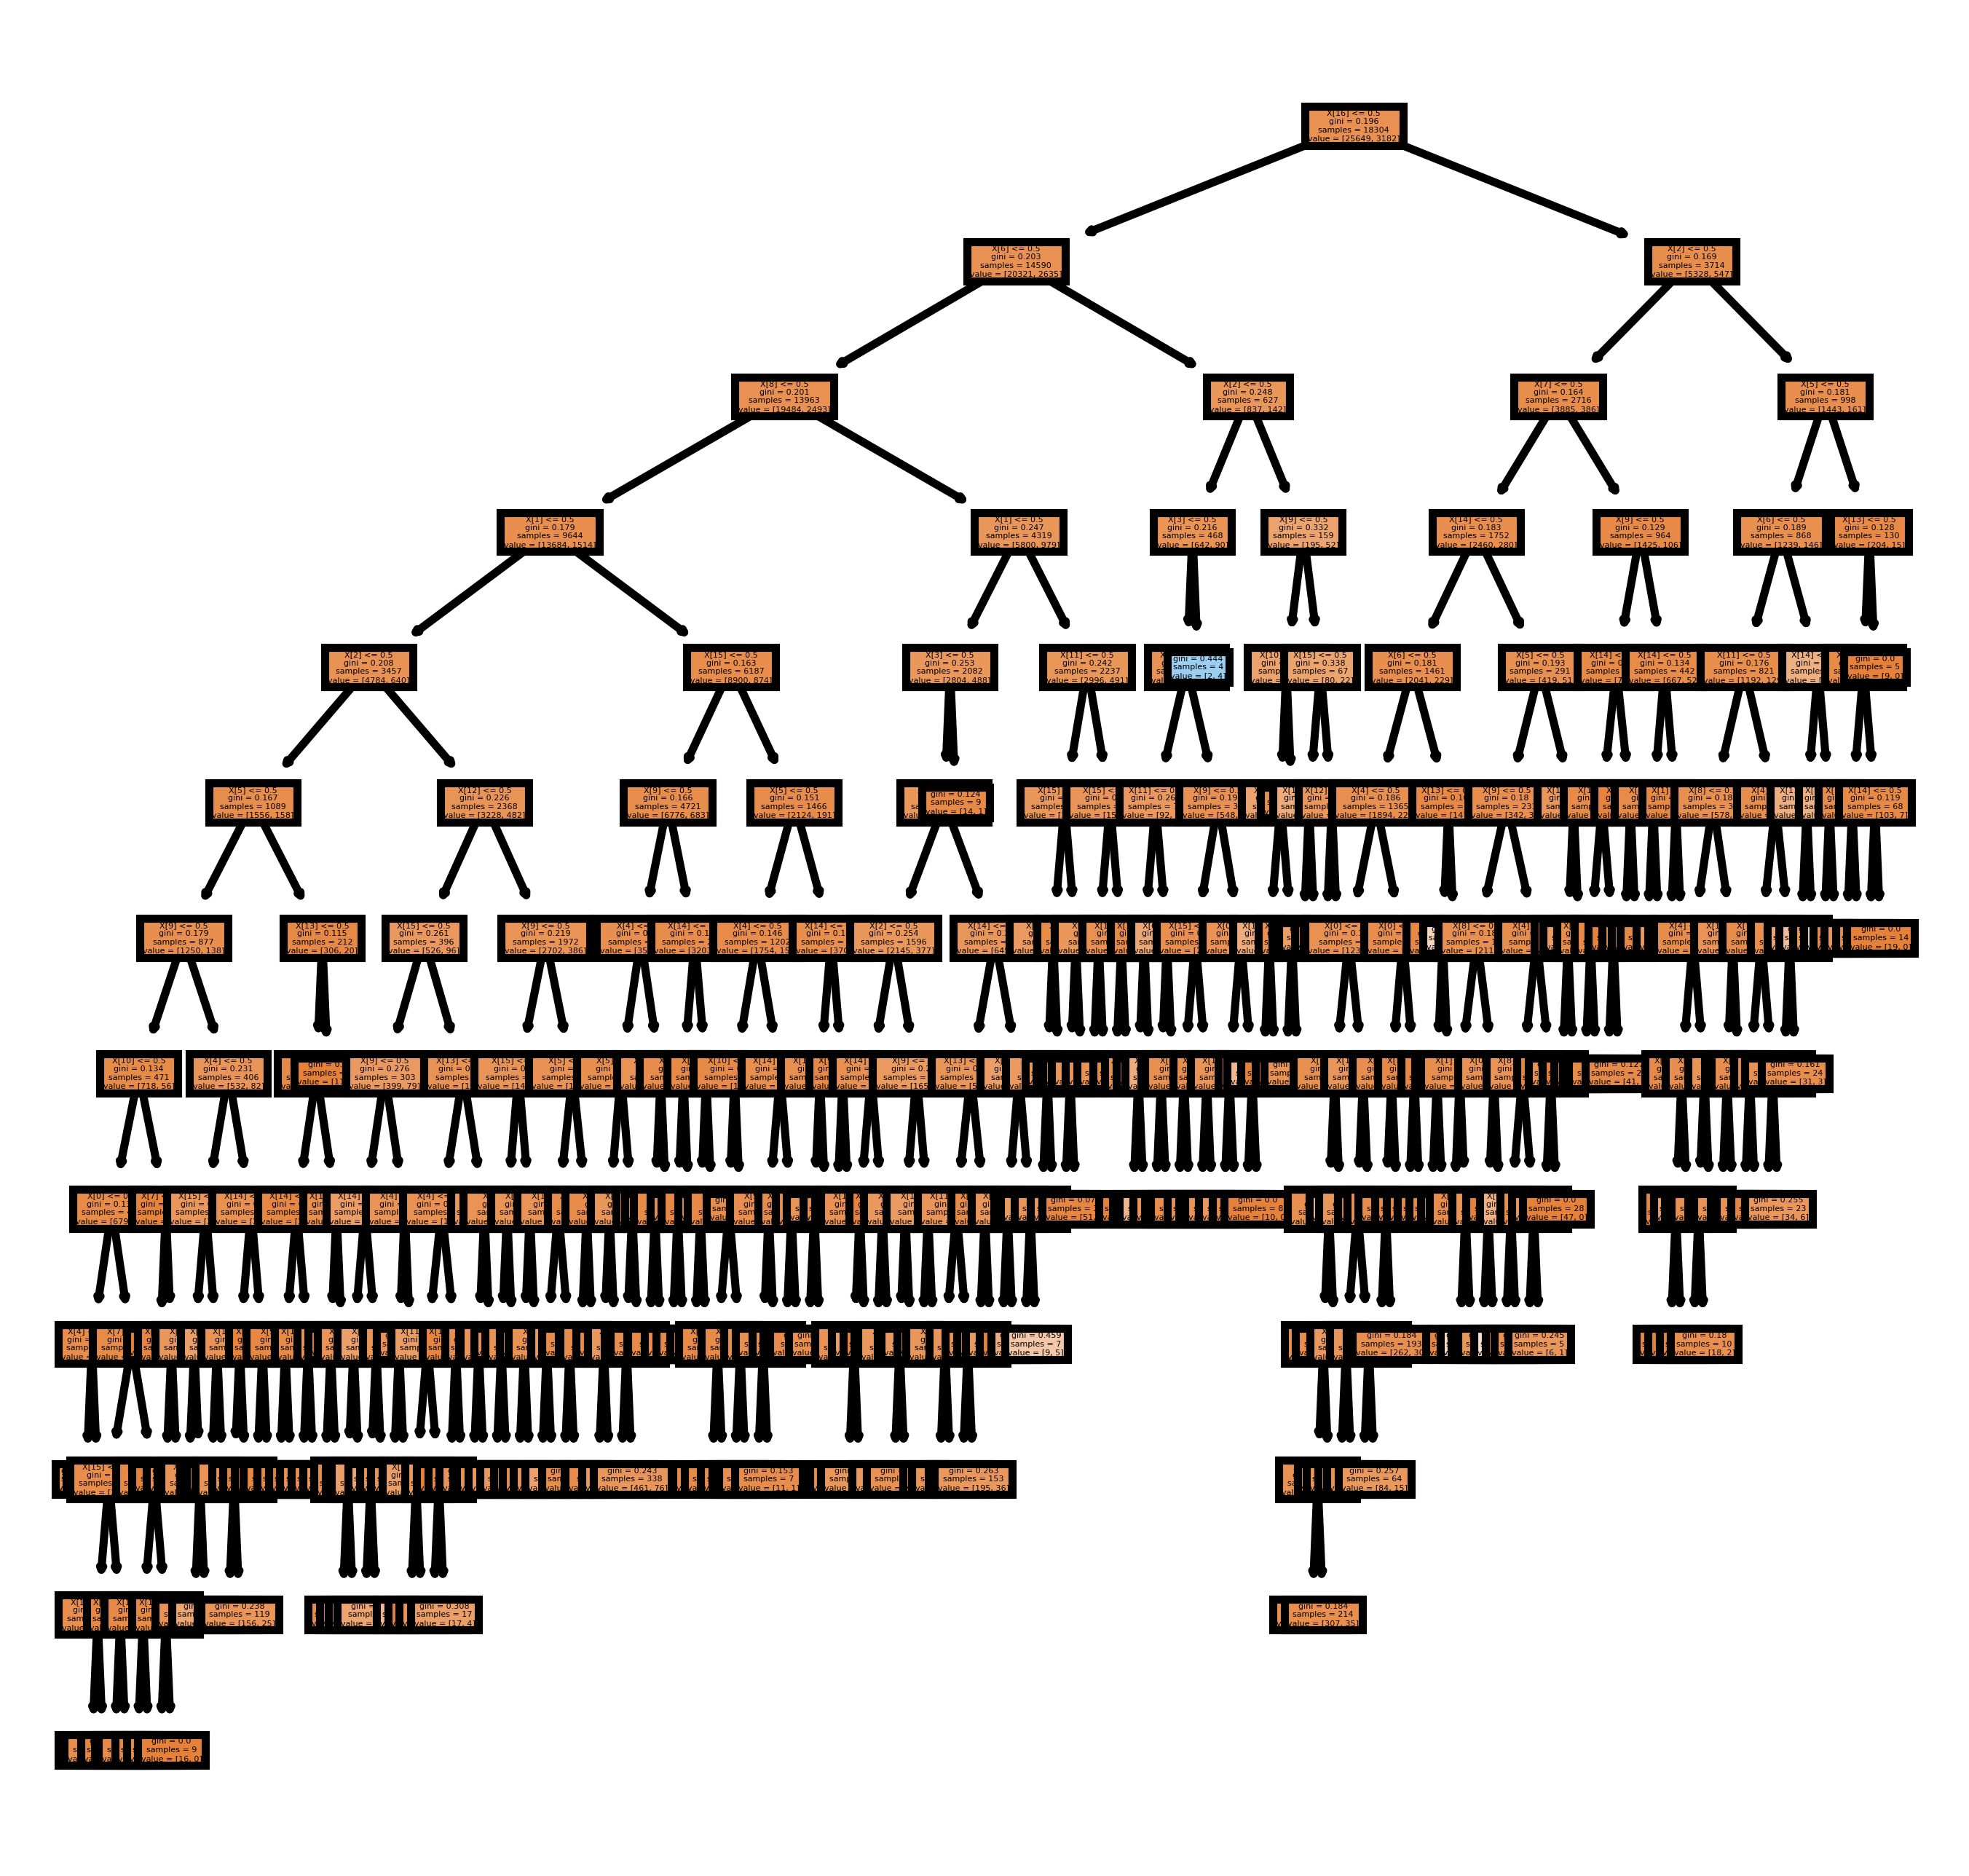

In [63]:
# Import the necessary packages.
import matplotlib.pyplot as plt
from sklearn import tree  # [1a]
from sklearn.tree import export_graphviz

# Plot the decision tree to create the visualisation.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(forest.estimators_[0],
               filled = True);

# Print and save the plot.
fig.savefig('rf_individualtree.png')

In [64]:
# Import the necessary package:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Print a report on the model's accuracy:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[10981     0]
 [ 1376     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10981
           1       0.00      0.00      0.00      1376

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357

0.88864611151574


#### You can also determine the importance of each feature in constructing the random forest. Features that are not as important, can then be eliminated to created a more structured and clearer random forest. To determine the importance of a feature in the forest, follow these prompts:

Elapsed time to compute the importances: 0.055 seconds


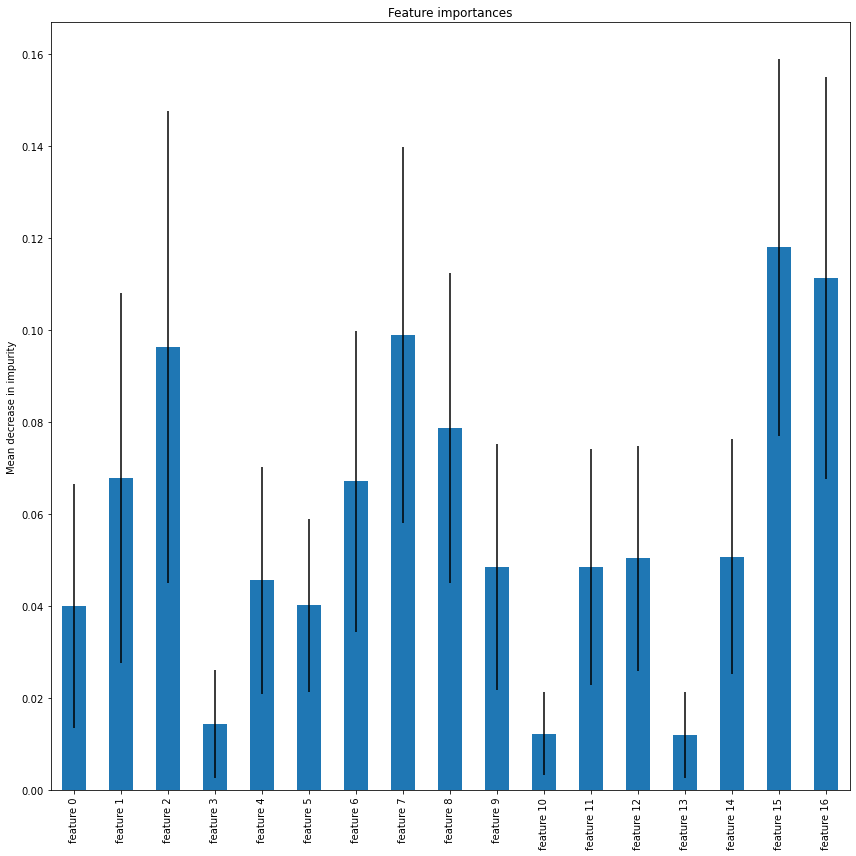

In [65]:
# Import necessary packages:
import time
import numpy as np

# Create a list of feature names:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

# Start measuring the time required to construct the random forest mode:
start_time = time.time()
# Determine feature importance.
importances = forest.feature_importances_ 

# Summarise the feature importance:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# Calculate the elapsed time.
elapsed_time = time.time() - start_time  
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Create a data structure to store the importances:
forest_importances = pd.Series(importances, index=feature_names)

# Construct a bar graph:
fig, ax = plt.subplots(figsize=(12, 12))
forest_importances.plot.bar(yerr=std, ax=ax)
# Set the title for the graph.
ax.set_title("Feature importances")  
# Set the label for the y-axis.
ax.set_ylabel("Mean decrease in impurity") 
# Adjust padding between and around subplots.
fig.tight_layout()

In [66]:
# Here every feature is hughly significant, so we could re-run the model eliminating features 3, 10, 13

### 2.3 Clustering using Python

### 2.3.4 Worked example I: K-means clustering in practice

1. Prepare your workstation

In [67]:
# Import libraries.
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Read the CSV file.
df = pd.read_csv('bookstore.csv')

# View the DataFrame.
print(df.shape)
print(df.dtypes)
df.head()

(13397, 14)
fb_id         int64
medium       object
published    object
reactions     int64
comments      int64
share         int64
like          int64
love          int64
excellent     int64
funny         int64
sad           int64
angry         int64
yes           int64
no            int64
dtype: object


,fb_id,medium,published,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,12987653,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1,0
1,12987654,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0
2,12987655,photo,3/21/2017 0:24,33,9,1,33,0,0,0,0,0,0,1
3,12987656,photo,3/21/2017 0:23,72,1,0,72,0,0,0,0,0,0,1
4,12987657,photo,3/21/2017 0:13,174,0,0,173,1,0,0,0,0,0,1


2. Evaluate the variables

In [68]:
# Display a summary of the numeric variables.
df.describe() 

,fb_id,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
count,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,1.299435e+07,375.496007,187.822348,27.894379,364.123460,9.523475,0.999030,0.499515,0.259984,0.085318,0.518997,0.481003
std,3.867525e+03,615.082883,922.957579,106.823723,611.454156,31.672009,6.464646,3.002503,1.796688,0.706974,0.499658,0.499658
min,1.298765e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299100e+07,32.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.299435e+07,136.000000,7.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.299770e+07,351.000000,21.000000,3.000000,327.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.300105e+07,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000


If you look at the raw data or the head() function output, you’ll see that two columns (medium and published) are not numerical variables, but object. Python considers published as a unique identifier. A unique identifier operates as a primary key, similar to an invoice number – so every value in this column will be unique. There’s no similarity between data points with unique identifiers, which means no clustering is possible. Therefore, we need to drop them from the data set before we perform the k-means clustering. 

But wait! What about the column product? Is it also a unique identifier? Yes, it is. Although product is an integer, it is a unique identifier. Remember that the medium and published are only invisible as the values are objects and not integers. However, these two columns are still in the DataFrame. The describe() method only returns columns that have integers. (Hint: You can also use the describe(include='all') method to include categorical columns, mode, count, frequency etc.)

In [69]:
# Display a summary of the numeric variables.
df.describe(include='all') 

,fb_id,medium,published,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
count,1.339700e+04,13397,13397,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
unique,NaN,4,4699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,photo,06/07/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7930,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.299435e+07,NaN,NaN,375.496007,187.822348,27.894379,364.123460,9.523475,0.999030,0.499515,0.259984,0.085318,0.518997,0.481003
std,3.867525e+03,NaN,NaN,615.082883,922.957579,106.823723,611.454156,31.672009,6.464646,3.002503,1.796688,0.706974,0.499658,0.499658
min,1.298765e+07,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299100e+07,NaN,NaN,32.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.299435e+07,NaN,NaN,136.000000,7.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.299770e+07,NaN,NaN,351.000000,21.000000,3.000000,327.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


3. Drop unneeded columns

Based on the previous outputs, we concluded that there are three columns (product, medium, published) earmarked as unique identifiers. In general, unique identifiers consist of values that are not repetitive. You write a simple code snippet to determine the number of values of a unique identifier. Based on the output, you can then decide whether to delete that column

In [71]:
# Display the output and 
# return the length of the data structure: 
print(len(df['fb_id'].unique()))
print(len(df['medium'].unique()))
print(len(df['published'].unique()))

13397
4
4699


There are 13,397 unique variables in the product column, four in the medium, and 4,699 in the published column. Clustering cannot be performed on columns with a big number of values (unique variables). Therefore, we will drop the fb_id and published columns from the data set

In [73]:
# Employ the drop() function and 
# indicate the element to drop:
df.drop(['fb_id', 'published'], axis=1, inplace=True)

# Display the column names.
df.columns

Index(['medium', 'reactions', 'comments', 'share', 'like', 'love', 'excellent',
       'funny', 'sad', 'angry', 'yes', 'no'],
      dtype='object')

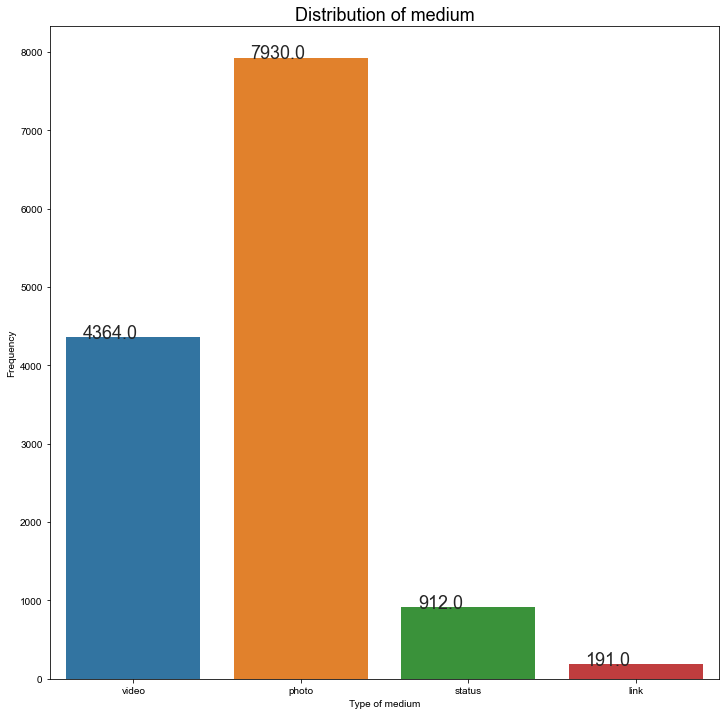

In [74]:
# Import the necessary packages:
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the overall frame and [2a, b] the bars for the plot:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='medium', data=df)
sns.set(font_scale = 1.5)
sns.set_style('white')

# Specify the plot title, x-axis label, and the y-axis label:
plt.title("Distribution of medium")
plt.xlabel("Type of medium")
plt.ylabel("Frequency")

# Annotate the bars with values:
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), va='center') 

# key: 3=video, 2=status, 1=photo, 0=link

#### Hmm, the data seems to be biased towards photos (7,930 instances) and video media (4,364 instances). This is good information because we can use medium as the target variable! More on this in the next step.

4. Specify the target variable

In [75]:
# Define the independent variable.
X = df 
# Define the dependent variable.
y = df['medium']

In [ ]:
# Next, we need to convert the target variable to an integer(s)

In [76]:
# Import the LabelEncoder class:
from sklearn.preprocessing import LabelEncoder

# Create an object from the class.
le = LabelEncoder() 

# Modify the DataFrame column with integer values:
X['medium'] = le.fit_transform(X['medium'])

y = le.transform(y)

In [77]:
# Check that label encoding happened correctly using the info() method:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13397 entries, 0 to 13396
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   medium     13397 non-null  int64
 1   reactions  13397 non-null  int64
 2   comments   13397 non-null  int64
 3   share      13397 non-null  int64
 4   like       13397 non-null  int64
 5   love       13397 non-null  int64
 6   excellent  13397 non-null  int64
 7   funny      13397 non-null  int64
 8   sad        13397 non-null  int64
 9   angry      13397 non-null  int64
 10  yes        13397 non-null  int64
 11  no         13397 non-null  int64
dtypes: int64(12)
memory usage: 1.2 MB


In [78]:
# Check that label encoding happened correctly using the head() method.
X.head() 

,medium,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,3,529,512,262,432,92,3,1,1,0,1,0
1,1,150,0,0,150,0,0,0,0,0,1,0
2,1,33,9,1,33,0,0,0,0,0,0,1
3,1,72,1,0,72,0,0,0,0,0,0,1
4,1,174,0,0,173,1,0,0,0,0,0,1


Done. You’ve converted the data in the medium column (i.e. the target variable) to integer values (numbers), which are meaningful and will now inform the clusters we generate. While not always necessary, normalising data at this early stage in the data analysis process improves the accuracy and efficiency of k-means clustering algorithms, resulting in higher-quality, more reliable clusters.

5. Normalise the data set

In [79]:
# Create an list with the column labels from X:
x_cols = X.columns

# Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler 

# Create the object from MinMaxScaler.
ms = MinMaxScaler() 
# Modify X to scale values between 0 and 1.
X = ms.fit_transform(X) 
# Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns=[x_cols]) 

# Check the contents of the modified DataFrame.
X.head() 

,medium,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.0,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,0.333333,0.007006,0.000429,0.000292,0.007006,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
3,0.333333,0.015287,0.000048,0.000000,0.015287,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
4,0.333333,0.036943,0.000000,0.000000,0.036730,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0


6. Apply the clustering algorithm

In [81]:
# We can do this ONCE THE DATA IS PREPARED!!!

In [82]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Create the object and specify the parameters:
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the k means to the data set. 
kmeans.fit(X) 

KMeans(n_clusters=2, random_state=0)

In [83]:
# Indicate kmeans() applies to cluster_centers. 
kmeans.cluster_centers_ 

array([[ 5.63676805e-01,  7.97700522e-02,  9.95437217e-03,
         8.62467332e-03,  7.72335167e-02,  1.53255728e-02,
         3.47878122e-03,  3.54252413e-03,  5.34012488e-03,
         2.56302437e-03,  4.55191440e-15,  1.00000000e+00],
       [ 5.72846253e-01,  7.96796690e-02,  8.01565154e-03,
         7.70376130e-03,  7.73781682e-02,  1.37259937e-02,
         3.70007460e-03,  2.84714200e-03,  4.87305522e-03,
         2.92749011e-03,  1.00000000e+00, -4.71844785e-15]])

The cluster centres were calculated. What does this mean? The k-means algorithm clusters data by trying to separate samples into a given number of groups of equal variances. This will minimise the inertia (which measures how well a data set was clustered by k-means; the lower the inertia the tighter/denser the cluster). 

The code snippet used the k-means algorithm to sort a set of samples of the data (X) into two disjoint clusters, each described by the mean of the samples in the cluster. These are also called cluster centroids. The k-means algorithm aims to choose centroids that minimise the variability of the data points/observations within each cluster (i.e. lower the inertia).

In [84]:
# Check the inertia for the data set.
kmeans.inertia_ 

1881.3383018237319

This value is very high. Inertia is not a normalised metric, but lower values are better – with zero as the optimal value. In this case, we don’t have a great fit for our data set. Remember that we’re working with a real-life business scenario. Real-life raw data is not always perfect, so high inertia is a common occurrence when performing k-means clustering.

7. Evaluate the output

As the inertia value was quite high, let’s evaluate the output. We can start by checking how many of the samples were labelled correctly. Remember that the first step before we can perform clustering is to label the data. The code snippet will be:

In [85]:
# Extract the labels from the k means.
labels = kmeans.labels_ 

# Add up correctly labelled instances. 
correct_labels = sum(y == labels) 

# Display the result.
print("%d of the %d samples were labeled." % (correct_labels, y.size))

4157 of the 13397 samples were labeled.


Only 4,157 of the 13,397 samples ( 31%) were labelled correctly. This is not good. How can we improve the output to make it more accurate?

8. Improve the accuracy

Remember, we started with k=2. Let’s change this number. We can employ two methods to calculate the optimal number of clusters: the elbow and the silhouette methods. The code snippet for the elbow method is:

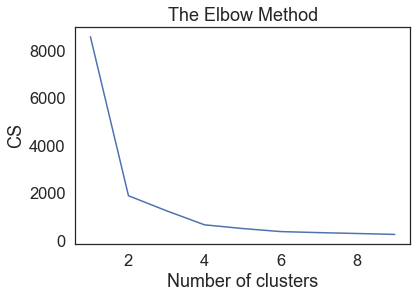

In [86]:
# Elbow chart for us to decide on the number of optimal clusters.
# Create a list to store the different cluster sizes.
cs = []

# Create a for loop.
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

# Plot the output.
plt.plot(range(1, 10), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

You've just created an elbow plot. According to the graph, the optimal number of clusters will be either three or four. Let's compare the silhouette method with the following code snippet:

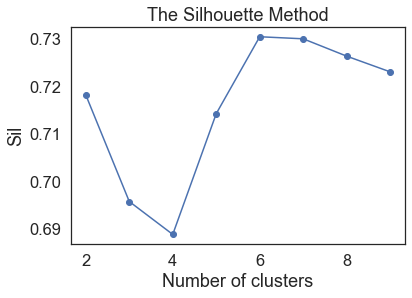

In [87]:
# Import the necessary packages.
from sklearn.metrics import silhouette_score, silhouette_samples

# Find the range of clusters to be used using silhouette method.
sil = []

kmax = 9

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

According to the graph, the optimal number of clusters will be four. Let’s investigate whether the accuracy improves, by testing k=3 and k=4. The code snippet will be:

In [88]:
# k=3

# Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=3, random_state=0)
# Apply fit(), using the DataFrame, to the k-means object.
kmeans.fit(X) 

# Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# Display the accuracy score:
print("%d of %d samples were labeled." % (correct_labels, y.size))

print('Accuracy= {0:0.2f}'. format(correct_labels/float(y.size)))

4665 of 13397 samples were labeled.
Accuracy= 0.35


In [89]:
# k=4

# Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=4, random_state=0)
# Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# Display the accuracy score:
print("%d of %d samples were labeled." % (correct_labels, y.size))

print("Accuracy= {0:0.2f}". format(correct_labels/float(y.size))) 

6545 of 13397 samples were labeled.
Accuracy= 0.49


In [90]:
# k=5

# Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=5, random_state=0)
# Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# Display the accuracy score:
print("%d of %d samples were labeled." % (correct_labels, y.size))

print("Accuracy= {0:0.2f}". format(correct_labels/float(y.size))) 

950 of 13397 samples were labeled.
Accuracy= 0.07


Fantastic! The accuracy is now 49% and a great improvement. You can try to fit the k=5 cluster. What do you see? Do you understand that k=4 will give you the best accuracy? Remember that if the “elbow” is not completely visible or clear, you can apply ‘trial and error’ to test different values for k.

9. Visualise the clusters

The last step is to visualise the data (clusters). You can play around with the figure size, but for illustrative purposes, we used dimensions of 26,6. The visualisation should be a 3D scatter plot, as we have three-axis (x='Reactions', y='Share', z='Like'). Let’s construct two scatter plots to indicate the number of reactions and the number of comments, using share and like. For the first scatter plot, we’ll indicate the number of reactions:

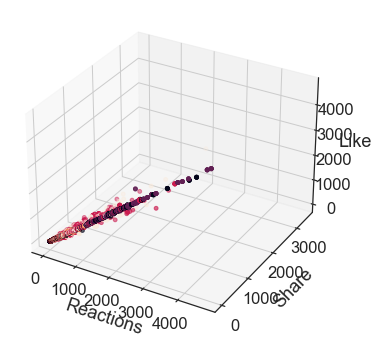

In [91]:
# Create the figure area.
fig = plt.figure(figsize=(26,6)) 
# Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df['reactions'], df['share'], 
df['like'], c=labels, s=15)

# Set the label for each dimension:
ax.set_xlabel('Reactions')
ax.set_ylabel('Share')
ax.set_zlabel('Like')

# Show the plot.
plt.show() 

In [92]:
# Now let’s repeat the process to indicate the number of comments (again, using share and like).

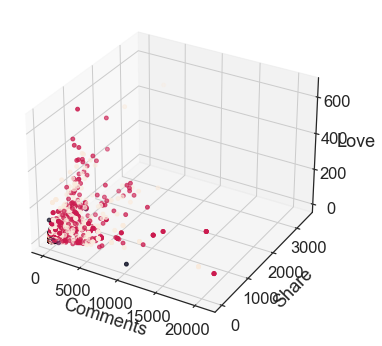

In [93]:
# Create the figure area.
fig = plt.figure(figsize=(26,6)) 

# Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df['comments'], df['share'], 
df['love'], c=labels, s=15)

# Set the label for each dimension:
ax.set_xlabel('Comments')
ax.set_ylabel('Share')
ax.set_zlabel('Love')

# Show the plot.
plt.show()

Unlabelled data with similar characteristics are grouped together into clusters. In the worked example, only 6,545 of the 13,397 samples were correctly labelled. This might be one reason why the accuracy was only 49%. The higher the number of labelled samples, the higher the accuracy. The elbow method indicated that four clusters will give the highest accuracy. Other reasons for the low accuracy level might be the number of data points, how the data was collected or captured, and so forth. 

Instagram is an increasingly popular sales technique that leads to more sales opportunities and a better customer journey. As such, data analysts are sought-after to provide insight into how customers are behaving in response to various mediums (e.g. photos, videos, and links). In this demonstration, you worked to identify the relevant clusters for customer reactions and comments.

### 2.3.5. Worked example II: K-means clustering in practice

1. Prepare your workstation

In [94]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

# Load the data.
df = pd.read_csv('fruit.csv')

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_length    1500 non-null   float64
 1   sepal_width     1500 non-null   float64
 2   tree_age        1500 non-null   int64  
 3   location        1500 non-null   object 
 4   colour_blossom  1500 non-null   object 
 5   fruit_type      1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [95]:
df.head()

,sepal_length,sepal_width,tree_age,location,colour_blossom,fruit_type
0,5.1,3.5,10,A_52,light_pink,apricot
1,4.9,3.0,10,A-52,light_pink,apricot
2,4.7,3.2,10,A-52,light_pink,apricot
3,4.6,3.1,10,A-52,light_pink,apricot
4,5.0,3.6,10,A-52,light_pink,apricot


2. Prepare the data

Before you can begin, you need to determine whether all the columns are needed. In this case, we will drop three columns (tree_age, location, colour_blossom). Next, check the summary of the numeric variable with the describe() function, which calculates the descriptive statistics of the data set:

In [96]:
# Drop unnecessary columns
df_fruit = df.drop(columns=['tree_age', 'location', 'colour_blossom'])

# Display a summary of the numeric variables.
df_fruit.describe()

,sepal_length,sepal_width
count,1500.000000,1500.000000
mean,6.030071,3.171469
std,0.975327,0.536772
min,3.941667,1.826087
25%,5.280000,2.800000
50%,5.980000,3.100000
75%,6.674000,3.480000
max,9.480000,5.300000


3. Visualise the data

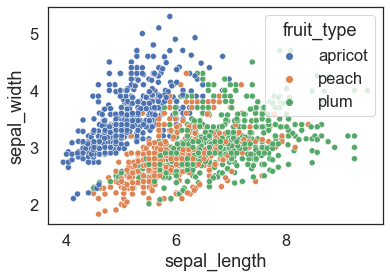

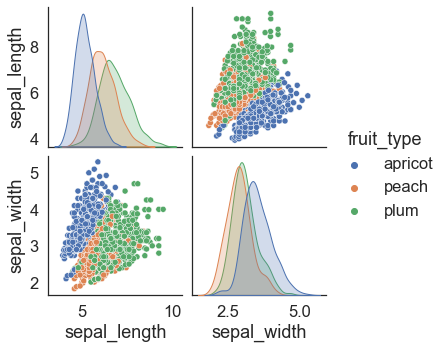

In [97]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='sepal_length', y='sepal_width',
                data=df_fruit, hue='fruit_type')


# Create a pairplot with Seaborn.
x = df_fruit[['sepal_length', 'sepal_width']]

sns.pairplot(df_fruit, vars=x,
             hue='fruit_type', diag_kind= 'kde')

Although there is a lot of data points overlaying, three groups are visible. How can you improve the accuracy or visibility of the three clusters? Let's investigate the elbow and silhouette methods.

4. Improve the accuracy

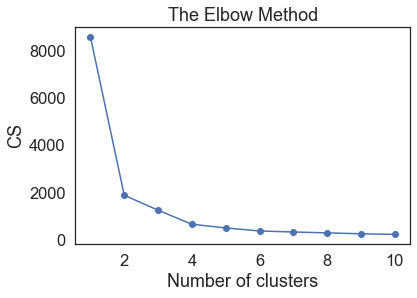

In [98]:
# ELBOW CHART

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

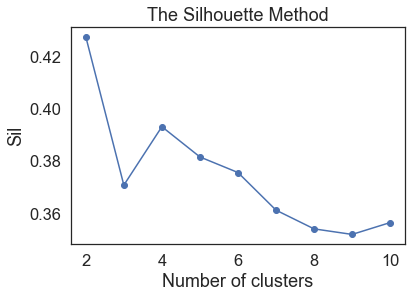

In [99]:
# SILHOUETTE CHART

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Look at that! You've created a silhouette plot. According to the graph, the optimal number of clusters will be four. Let’s investigate whether the accuracy improves, by testing k=3 and k=4. 

5a. Evaluate and fit the model K=4

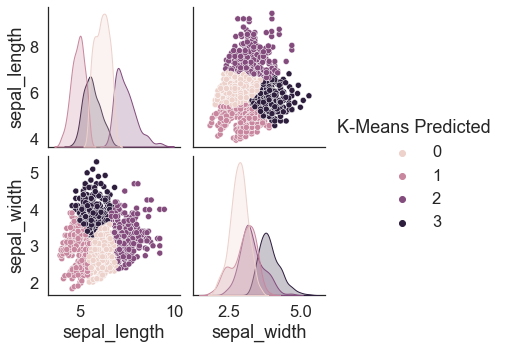

In [100]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [101]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    535
1    361
2    326
3    278
Name: K-Means Predicted, dtype: int64

Cluster 0 has the most data points, followed by cluster 1. 

6a. Visualise the clusters

In [102]:
# View the K-Means predicted.
print(x.head())

   sepal_length  sepal_width  K-Means Predicted
0           5.1          3.5                  1
1           4.9          3.0                  1
2           4.7          3.2                  1
3           4.6          3.1                  1
4           5.0          3.6                  1


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

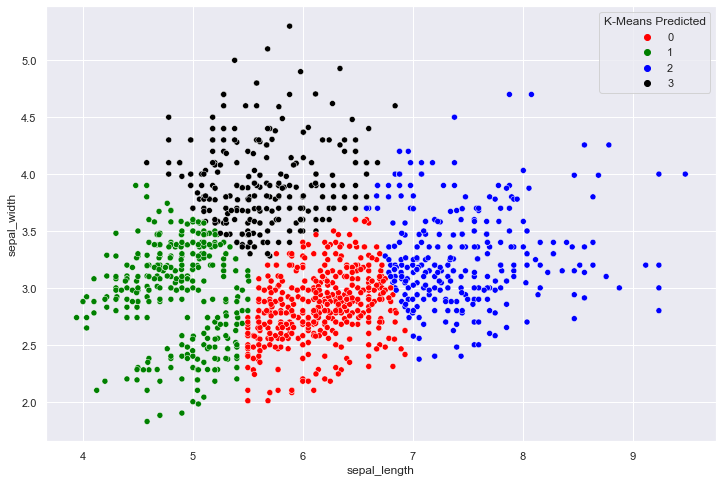

In [103]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

5b. Evaluate and fit the model K=3

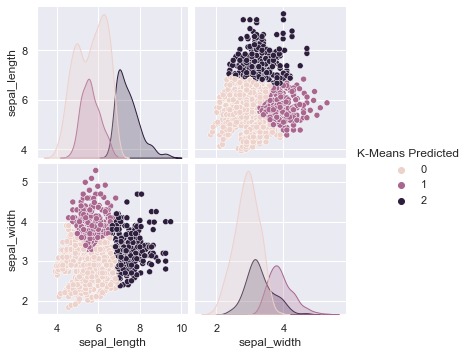

In [104]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [105]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    896
2    326
1    278
Name: K-Means Predicted, dtype: int64

6b. Visualise the clusters

In [106]:
# View the K-Means predicted.
print(x.head())

   sepal_length  sepal_width  K-Means Predicted
0           5.1          3.5                  0
1           4.9          3.0                  0
2           4.7          3.2                  0
3           4.6          3.1                  0
4           5.0          3.6                  0


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

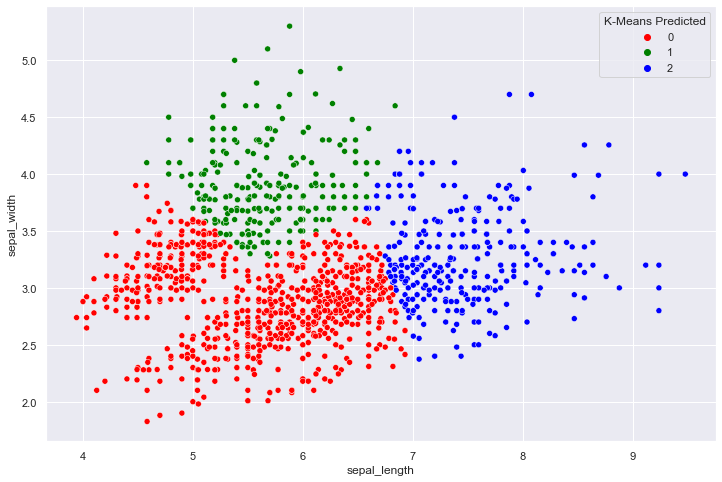

In [107]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

Three clusters are clearly visible with some outliers. How does this scatterplot compare to the four cluster scatterplot?

In [114]:
# We need to EVALUATE BOTH OUTPUTS
# K=4
# K=3

#### QUESTION FOR NORAH: how can we evaluate the output % of the correctly labeled datapoints if we haven't defined variables??

### 2.1.6 Practical activity: Building a BLR model

In [177]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

In [178]:
df = pd.read_csv('breast_cancer_data.csv')

In [179]:
# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [180]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [182]:
# Determine the descriptive statistics.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [181]:
# Determine if there are any null values.
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [183]:
# All null values will be dropped.
df.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [184]:
# Determine the count of values.
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [185]:
# Data is not balanced so let's balance it and set dependent and independent variables

In [186]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

In [187]:
# Set the variables:
X = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

# Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame
print(os_data_X.head())
os_data_y.head()

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       11.490         14.59           73.99      404.9          0.10460   
1       10.490         18.61           66.86      334.3          0.10680   
2       12.250         17.94           78.27      460.3          0.08654   
3       18.310         18.58          118.60     1041.0          0.08588   
4        6.981         13.43           43.79      143.5          0.11700   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.08228         0.05308              0.01969         0.1779   
1           0.06678         0.02297              0.01780         0.1482   
2           0.06679         0.03885              0.02331         0.1970   
3           0.08468         0.08169              0.05814         0.1621   
4           0.07568         0.00000              0.00000         0.1930   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

,diagnosis
0,B
1,B
2,B
3,M
4,B


In [188]:
# Determine the count of values to see if now the model is normalised
os_data_y['diagnosis'].value_counts(normalize=True)

B    0.5
M    0.5
Name: diagnosis, dtype: float64

#### QUESTION FOR NORAH: What random state do we choose? 0,1? Shall we choose size of sample (i.e. 0.3) or leave it unchecked?

In [189]:
# Specify and fit the model.
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [193]:
# Determine BLR model’s accuracy:
y_pred = logreg_model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [194]:
# Calculate the predicted labels and predicted probabilities on the test set.
# Predict test class.
y_pred = logreg_model.predict(X_test)

# Predict test probability.
y_pp = logreg_model.predict_proba(X_test)

In [196]:
# Create the confusion matrix for your classifier's performance on the test set.
con_mat = confusion_matrix(y_test, y_pred, labels=['M', 'B'])


# Predict cancer based on some kind of detection measure, like we did before.
confusion = pd.DataFrame(con_mat, index=['predicted_cancer','predicted_healthy'],
                         columns=['is_cancer', 'is_healthy'])

# View the output.
confusion

,is_cancer,is_healthy
predicted_cancer,61,2
predicted_healthy,6,102


In [197]:
# Use float to perform true division, not integer division.
print(metrics.accuracy_score(y_test, y_pred))

0.9532163742690059


In [198]:
# Create a confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[102   6]
 [  2  61]]


In [199]:
# Create an accuracy report.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.98      0.94      0.96       108
           M       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

